In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import scipy as sp


In [21]:
class mykde:
    
    def __init__(self):
        pass
    
    def gaus1d(self,x,x_i, bandwidth):
        x_bar  = x_i
        pdf_1d = (np.sqrt(2*np.pi*bandwidth**2)**-1) * np.exp(-((x - x_bar)**2)/(2*bandwidth**2))
        return(pdf_1d)
    
    def gaus2d(self,x=0, y=0, mx=0, my=0, sx=1, sy=1):
        pdf_2d = 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))
        return(pdf_2d)
    
    def kde_1d(self,x_i,bandwidth):
        mu=x_i
        variance = bandwidth
        sigma= variance
        x = np.linspace(min(mu) - 3*sigma, max(mu) + 3*sigma, 10000)
        kde_final= np.zeros(10000)
        for i in range(len(mu)): 
            a=self.gaus1d(x, mu[i], sigma)
            kde_final=kde_final+a
        kde_final /= sp.integrate.simps(kde_final, x)
        plt.plot(x,kde_final)
        plt.show()
        
    def kde_2d(self,x_i,y_i,bandwidth):
        X = x_i
        Y = y_i
        x = np.linspace(-5, 5)
        y = np.linspace(-5, 5)
        width= bandwidth 
        x, y = np.meshgrid(x, y)
        kde_final= np.zeros((50,50))
        for i in range(len(X)): 
            a=self.gaus2d(x,y,mx=X[i], my=Y[i],sx=width, sy=width)
            kde_final=kde_final+a
        plt.contourf(x, y, kde_final/len(X), cmap='Blues')
        plt.colorbar()
        plt.show()
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot_surface(x, y, kde_final/len(X), rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')

        ax.set_title('surface')
        ax.view_init(30, 30)
        fig

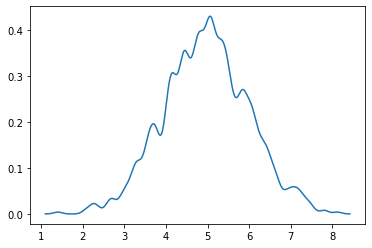

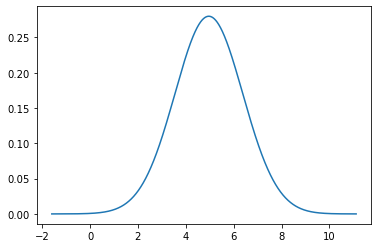

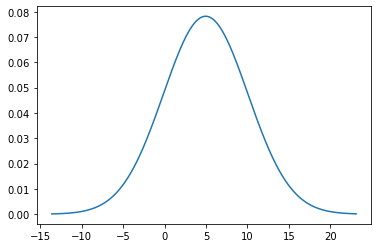

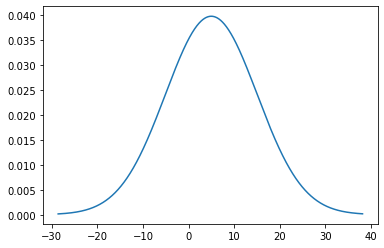

In [26]:
mu, sigma = 5, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

mu1, sigma1 = 0, .2 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)

S= np.stack([s,s1]).reshape(-1)

# 1d KDE plot
kde=mykde()
kde.kde_1d(s,.1)
kde.kde_1d(s,1)
kde.kde_1d(s,5)
kde.kde_1d(s,10)

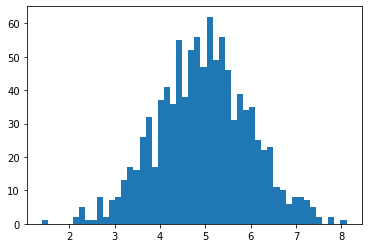

In [42]:
plt.hist(s,50);

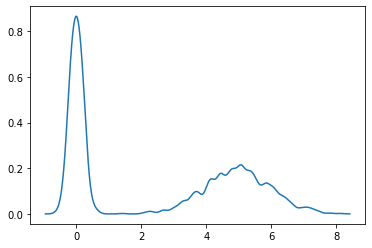

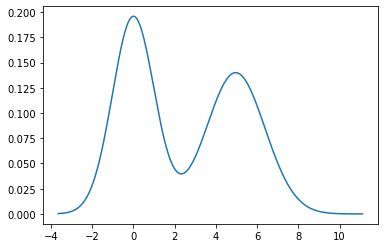

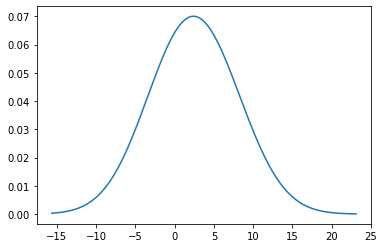

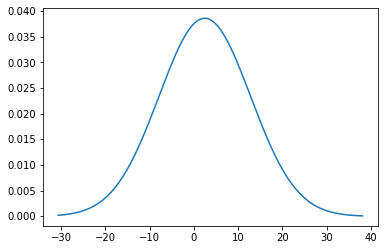

In [27]:
kde.kde_1d(S,.1)
kde.kde_1d(S,1)
kde.kde_1d(S,5)
kde.kde_1d(S,10)

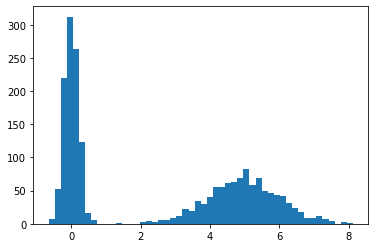

In [43]:
plt.hist(S,50);

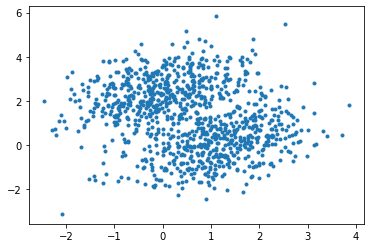

In [39]:
mean1 = [1, 0]
mean2 = [0, 2.5]
cov1 = [[.9, .4], [.4, .9]]
cov2 = [[.9, .4], [.4, .9]] 
    #Creating training set
x1, y1 = np.random.multivariate_normal(mean1, cov1, 500).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T
X= np.concatenate([x1,x2])
Y= np.concatenate([y1,y2])
z1=np.vstack((x1,y1)).T
z2=np.vstack((x2,y2)).T
plt.plot(X,Y,'.')


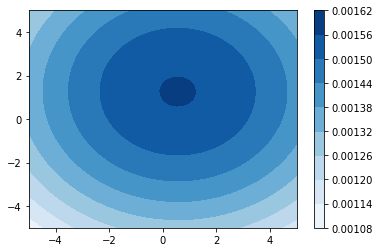

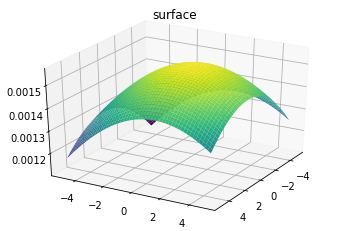

In [51]:
# 2d KDE plot
kde=mykde()

kde.kde_2d(X,Y,10)
